In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline


location = 'diabetes.csv'
f = pd.read_csv(location)
data = pd.DataFrame(f)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
cols_clean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pedigree']

# with this function , i dealt with missing values and NaN values 
for i in cols_clean:
    data[i] = data[i].replace(0,np.NaN)
    cols_mean = int(data[i].mean(skipna=True))
    data[i] = data[i].replace(np.NaN, cols_mean)
data1 = data
data1.head().style.highlight_max(color="lightblue").highlight_min(color="red")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.000000,72.000000,35.000000,155.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,155.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.000000,155.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1


In [3]:
print(data1.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.00000   
mean      3.845052  121.682292      72.386719      29.108073  155.28125   
std       3.369578   30.435999      12.096642       8.791221   85.02155   
min       0.000000   44.000000      24.000000       7.000000   14.00000   
25%       1.000000   99.750000      64.000000      25.000000  121.50000   
50%       3.000000  117.000000      72.000000      29.000000  155.00000   
75%       6.000000  140.250000      80.000000      32.000000  155.00000   
max      17.000000  199.000000     122.000000      99.000000  846.00000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    32.450911    0.471876   33.240885    0.348958  
std      6.875366    0.331329   11.760232    0.476951  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.500000    0.243750   24.000000   

In [4]:
# for the purpose of simplicity and analysing the most relevent  data , we will select three features of the dataset
# Glucose , Insulin and BMI
q_cols = ['Glucose','Insulin','BMI','Outcome']

# defining variables and features for the dataset for splitting 
df = data1[q_cols]
print(df.head(2))

   Glucose  Insulin   BMI  Outcome
0    148.0    155.0  33.6        1
1     85.0    155.0  26.6        0


In [5]:
# let's split the data into training and testing datasets
split = 0.75 # 75% train and 25% test dataset
total_len = len(df)
split_df = int(total_len*split)
train, test = df.iloc[:split_df,0:4],df.iloc[split_df:,0:4] 
train_x = train[['Glucose','Insulin','BMI']]
train_y = train['Outcome']
test_x = test[['Glucose','Insulin','BMI']]
test_y = test['Outcome']

In [6]:
a = len(train_x) 
b = len(test_x)
print(' Training data =',a,'\n','Testing data =',b,'\n','Total data length = ',a+b)

 Training data = 576 
 Testing data = 192 
 Total data length =  768


In [7]:
def knn(x_train, y_train, x_test, y_test,n):
    n_range = range(1, n)
    results = []
    for n in n_range:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train, y_train)
        #Predict the response for test dataset
        predict_y = knn.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, predict_y)
        #matrix = confusion_matrix(y_test,predict_y)
        #seaborn_matrix = sns.heatmap(matrix, annot = True, cmap="Blues",cbar=True)
        results.append(accuracy)
    return results

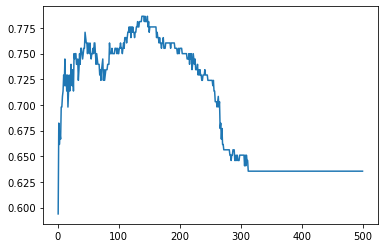

In [8]:
n= 500
output = knn(train_x,train_y,test_x,test_y,n)
n_range = range(1, n)
plt.plot(n_range, output) 